# Instruction

In [ ]:
# !pip install moviepy==2.1.1
# !pip install gymnasium
import torch
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

Tiến hành huấn luyện bằng cách gọi dòng lệnh ở dưới

In [ ]:
!python DQN.py --seed 21520398 --env-id CartPole-v0 --total-timesteps 200000 --c-window 50 --c-threshold 10 --min-episodes 500 --capture-video --tqdm_flag

* `env_id` là tên môi trường
* cờ `capture-video` dùng để ghi lại video chơi game trong quá trình huấn luyện
* cờ `tqdm_flag` để sử dụng tqdm hiển thị thanh tiến độ
* `c-window` và `c-threshold` quyết định việc dừng training sớm nếu kết quả không cải thiện (hoặc không đáng kể) sau 1 số lượng episode liên tiếp
* Tham số `min-episodes` để kiểm tra xem thuật toán đã phát sinh đủ số lượng tập trước khi xét điều kiện dừng training sớm
* Nếu không truyền tham số `c_window`, thuật toán mặc định chạy hết toàn bộ `total_timesteps`

Chi tiết các tham số truyền vào xem ở file `DQN.py`

--------------
Hiển thị kết quả huấn luyện

In [ ]:
def plot_result(result_path):
    result = np.load(result_path)
    all_rewards = result['all_rewards']
    training_times = result['training_times']
    # Tính thời gian thực thi cho mỗi episode
    plot_times = []
    l = 0
    for i in range(len(all_rewards)):
        r = int(all_rewards[i][0])
        plot_times.append(sum(training_times[l:r]))
        l = r
    plt.figure(figsize=(14, 6))
    plt.subplot(1,2,1)
    plt.xlabel('Step')
    plt.ylabel('Score')
    plt.title('Episode score over step')
    plt.plot(all_rewards[:, 0], all_rewards[:, 1], c='b')
    plt.subplot(1,2,2)
    plt.xlabel('Step')
    plt.ylabel('Time')
    plt.title('Episode training time over step')
    plt.plot(all_rewards[:,0], plot_times, c='r')
    plt.show()

result_path ='runs/DQN/CartPole-v0__21521992/results.npz'
plot_result(result_path)

------------------
Sau khi huấn luyện, nếu muốn thử nghiệm trên các seed khác nhau thì chạy các lệnh sau

In [ ]:
from DQN import DQN, NeuralNetwork
env_id = 'CartPole-v0'
device = torch.device('cpu')
q_net = NeuralNetwork(gym.make(env_id), device=device)
q_net.load_state_dict(torch.load('runs/DQN/CartPole-v0__21521992/Step_172001.pth', map_location=device))   # Thay đổi đường dẫn cho phù hợp
q_net.eval()
rewards, steps = DQN.play_multiple_times(env_id, q_net, seed_list=[21521992, 21521993], max_step = 500)
print(f'Average rewards: {np.mean(rewards)}, Average steps: {np.mean(steps)}')

Average rewards: 500.0, Average steps: 500.0


------------
Nếu muốn ghi lại file video phát sinh thì chạy như sau

In [ ]:
env_id = 'CartPole-v0'
device = torch.device('cpu')
q_net = NeuralNetwork(gym.make(env_id), device=device)
q_net.load_state_dict(torch.load('runs/DQN/CartPole-v0__21521992/Step_172001.pth', map_location=device))
q_net.eval()
video_output_path = 'output_video.mp4'       # Thay đổi đường dẫn cho phù hợp
reward, step = DQN.play(env_id, q_net, seed=1234, max_step = 500, capture_video=True, video_output_path=video_output_path)

Hiển thị video

In [ ]:
from IPython.display import Video
def display_video(video_output_path):
    return Video(video_output_path, embed=True, width=720, height=480)
display_video(video_output_path)

# CartPole-v0

In [ ]:
!python DQN.py --seed 21520398 --env-id CartPole-v0 --total-timesteps 200000 --c-window 50 --c-threshold 10 --min-episodes 500 --capture-video --tqdm_flag

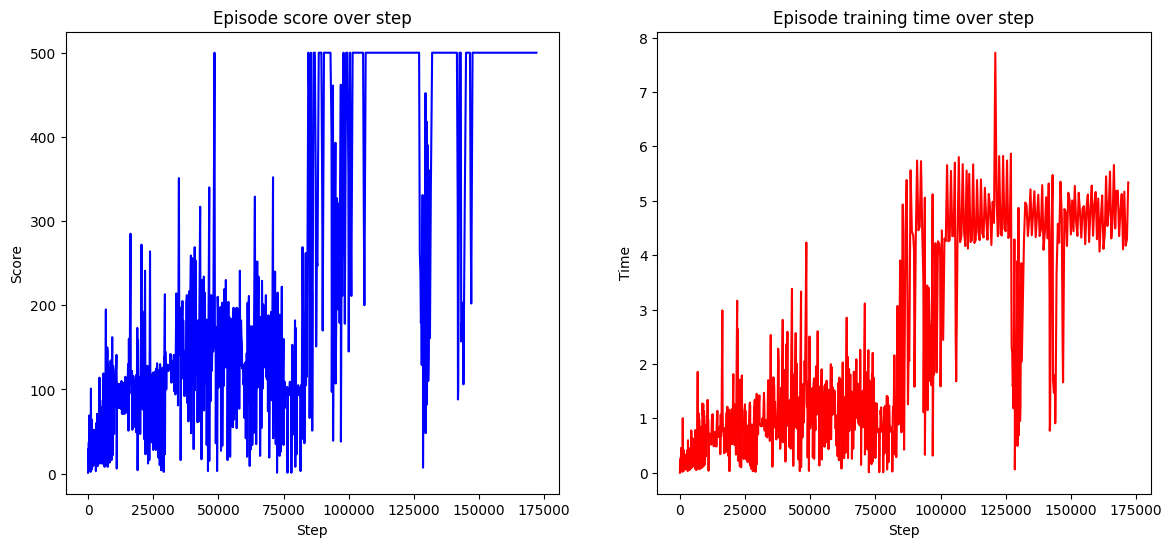

In [ ]:
result_path ='runs/DQN/CartPole-v0__21521992/results.npz'
plot_result(result_path)

In [ ]:
video_output_path = 'videos/DQN/CartPole-v0__21521992/Step_172001.mp4'
display_video(video_output_path)

# MountainCar-v0

In [ ]:
!python DQN.py --seed 21522723 --env-id MountainCar-v0 --total-timesteps 200000 --c-window 50 --c-threshold 10 --min-episodes 500 --capture-video --tqdm_flag

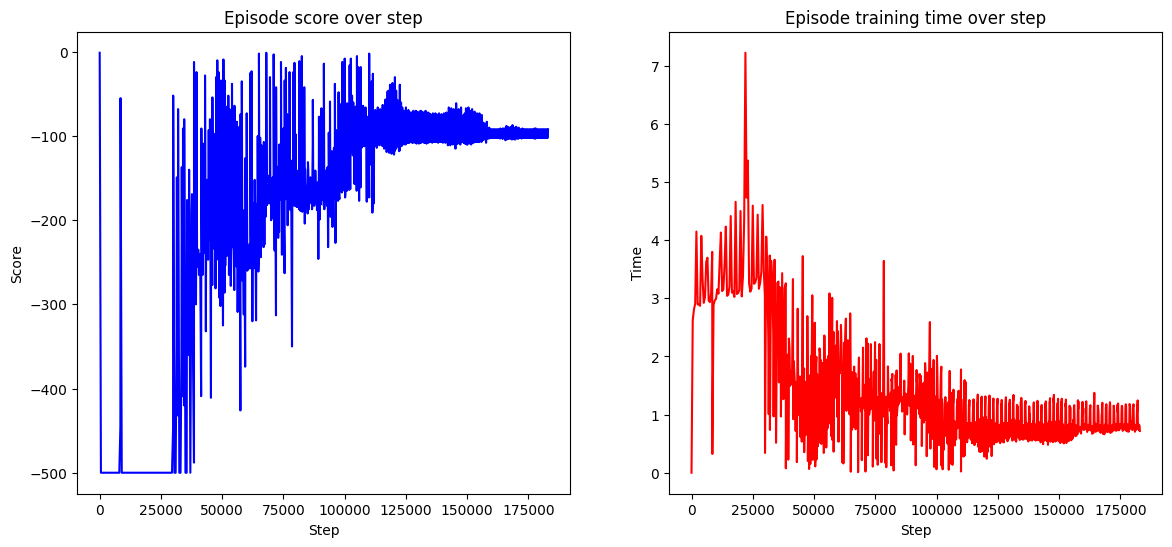

In [ ]:
result_path ='runs/DQN/MountainCar-v0__21521992/results.npz'
plot_result(result_path)

In [ ]:
video_path = 'videos/DQN/MountainCar-v0__21521992/Step_183001.mp4'
display_video(video_path)